In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('../02_Daten/Simulation-Dichteprüfung/simulation-st5.csv', sep=';')

C:\Users\pauls\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,7,10,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Richtige Zeit für alle Einträge
df['date'] = [datetime.utcfromtimestamp(x/1000) for x in df['time']]

In [4]:
df.head()

,time,configuration_label,configuration_label_druck_change_5,configuration_label_druck_change_6,configuration_label_druck_change_7,druck,handaktiv,identnummer,iomaster,leck,maintenance_label,maintenance_label_cleaning,messenaktiv,repair_label,rework_label,rework_label_assembly_error,status,date
0,1635112800000,NaN,False,False,False,5.362381,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:00
1,1635112801000,NaN,False,False,False,4.604942,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:01
2,1635112802000,NaN,False,False,False,6.139246,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:02
3,1635112803000,NaN,False,False,False,5.217539,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:03
4,1635112804000,NaN,False,False,False,4.224132,False,NaN,False,0.0,NaN,False,False,NaN,NaN,False,0.0,2021-10-24 22:00:04


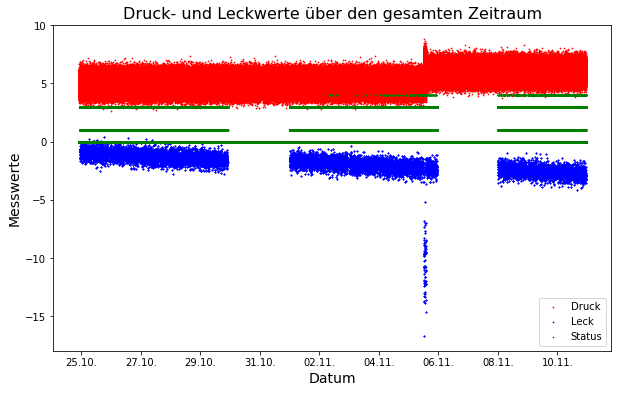

In [5]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df.date, df.druck, color='red', label='Druck', s=0.5)
ax.scatter(df.date, df.leck, color='blue', label='Leck', s=0.5)
ax.scatter(df.date, df.status, color='green', label='Status', s=0.5)

date_form = DateFormatter("%d.%m.")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2)) # damit nicht direkt nach dem 31.10 der 01.11 angezeigt wird
ax.xaxis.set_major_formatter(date_form)

ax.set_title("Druck- und Leckwerte über den gesamten Zeitraum", fontsize=16)
ax.set_xlabel("Datum", fontsize=14)
ax.set_ylabel("Messwerte", fontsize=14)

plt.legend(loc=4)

In [6]:
X = df[['druck', 'leck']]
y = df['status']

In [12]:
X

,druck,leck
0,5.362381,0.0
1,4.604942,0.0
2,6.139246,0.0
3,5.217539,0.0
4,4.224132,0.0
...,...,...
1455419,5.547973,0.0
1455420,6.251326,0.0
1455421,5.337404,0.0
1455422,6.055028,0.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from tslearn.svm import TimeSeriesSVC

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

#clf = TimeSeriesSVC(kernel="gak", gamma=.1)
#clf.fit(X_train, y_train)

#lr = LogisticRegression()
#lr.fit(X_train_scaled, X_test_scaled)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Correct classification rate:", knn.score(X_test, y_test))

Correct classification rate: 0.5228881755419726


In [26]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1091568
363856
1091568
363856


In [29]:
X_train

,druck,leck
1023009,5.407785,0.0
1139198,6.544073,0.0
667468,3.696339,0.0
701338,4.860960,0.0
365,5.952823,0.0
...,...,...
1289977,6.644937,0.0
735652,4.609787,0.0
1069400,6.869527,0.0
249793,4.319890,0.0


In [30]:
y_train

,druck,leck
542244,4.242014,0.0
64151,4.479609,0.0
911148,5.625864,0.0
1336755,6.188687,0.0
1407066,5.394088,0.0
...,...,...
1354620,5.422530,0.0
1410721,6.123832,0.0
845480,4.900631,0.0
683659,4.872267,0.0


In [ ]:
n_classes = len(set(y_train))
plt.figure()
support_vectors = clf.support_vectors_
for i, cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i + 1)
    plt.title("Support vectors for class %d" % cl)
    for ts in support_vectors[i]:
        plt.plot(ts.ravel())

plt.tight_layout()
plt.show()